Ce que j'ai fait:

- Récupération d'images sur Danbooru puis sur la version "safe" du site, les images récupérées sont différentes entre les 2. Dans les 2 cas je n'ai pas réussi à inclure dans mes requêtes un classement des images par score. J'ai inclu un tri après avoir récupérer les images, cela change l'odre des images mais c'est peu efficace. Je vous invite à considérer uniquement la version "safe", car même en incluant une demande de contenu safe sur le site classique on peut avoir des surprises.

- Récupération d'info sur les personnages via les wiki_pages de Danbooru. Les descriptions sont souvent ok lorsqu'il y en a. Je les ai pas clean mais ça marche.

- Récupération d'info via Wikipedia. On récupère l'introduction de la fiche. J'ai aussi fait une cellule pour récupérer les sections de wikipédia qui contiennent les mots clés "personnality" ou "character" qui pourraient nous orienter sur la personnalité de la personne.

- Récupération d'info sur des perso d'animé via AniList. D'abord sur les fiches des perso puis pour les perso principaux, via la page de leur animé (naruto dans naruto...), mais dans le 2nd cas, il faut je crois le lien de la page.


# 1) Récuperation image Danbooru

In [1]:
import requests
import os
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

### On considère la version classique du site

#### Téléchargement des images dans un dossier "images"

In [105]:
requete = "son_goku"
nb_images = 5

# Définir les paramètres de la requête
base_url = 'https://danbooru.donmai.us/posts.json'  # Endpoint pour récupérer les posts au format JSON
params = {
    'tags': f'{requete} rating:safe',  # rating:score ne change rien
    'limit': nb_images  # Limite de résultats (max 100 par requête)
    ,'search[order]': 'score'  # ne change rien non plus
    
# , 'search[score]': '>=900'
}

# Effectuer la requête GET
response = requests.get(base_url, params=params)

# Vérifier si la requête est réussie
if response.status_code == 200:
    images = response.json()  # Récupérer les résultats au format JSON
    
    # Créer un dossier pour sauvegarder les images
    os.makedirs('images', exist_ok=True)

    # Télécharger les images
    for image in images:
        image_url = image.get('file_url')
        if image_url:
            img_data = requests.get(image_url).content
            img_name = os.path.join('images', image_url.split('/')[-1])
            
            with open(img_name, 'wb') as handler:
                handler.write(img_data)
                print(f"Image sauvegardée sous : {img_name}")
else:
    print(f"Erreur dans la requête : {response.status_code}")

Image sauvegardée sous : images\117c0322933bc99912dd437d097fba36.gif
Image sauvegardée sous : images\9b12552494fb4440ea7fac336883ef1e.jpg
Image sauvegardée sous : images\5ac595b38e953ba5d1158afa80d11b99.jpg
Image sauvegardée sous : images\360a2875f5e9654f58663dffd5d1dc21.jpg
Image sauvegardée sous : images\9f973f3b056a7727472557dd166c1f62.png


#### Simple affichage des images

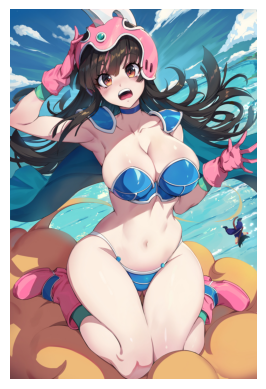

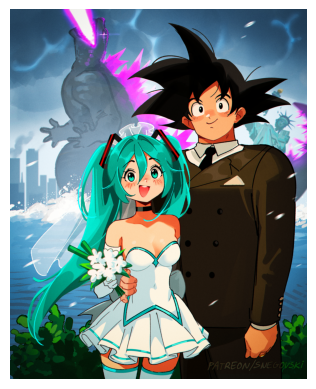

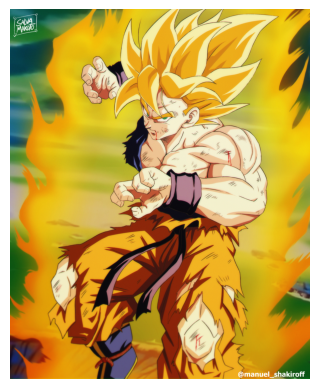

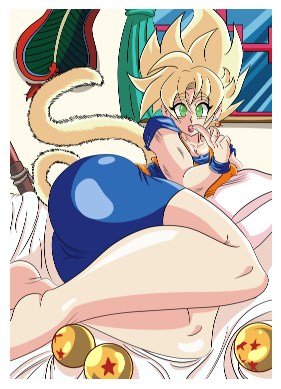

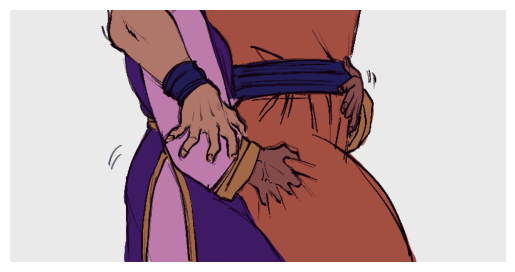

In [23]:
requete = "son_goku"
nb_images = 5

# Définir les paramètres de la requête
base_url = 'https://danbooru.donmai.us/posts.json'  # Endpoint pour récupérer les posts au format JSON

params = {
    'tags': f'{requete} rating:safe ',  # Filtrer les résultats par la balise et par rating 'safe', "rating:score" ne change rien
    'limit': nb_images                  # Limite de résultats (max 100 par requête)
    
    # Trier les images par score (meilleure note)
    # , 'search[score]': '>=900'
}

response = requests.get(base_url, params=params)

# Vérifier si la requête est réussie
if response.status_code == 200:
    images = response.json()  # Récupérer les résultats au format JSON    
    for image in images:
        image_url = image.get('file_url')
        if image_url:
            # Récupérer les données de l'image
            img_data = requests.get(image_url).content
            img = Image.open(BytesIO(img_data))  # Charger l'image en mémoire

            # Afficher l'image
            plt.imshow(img)
            plt.axis('off')  # Masquer les axes
            plt.show()
else:
    print(f"Erreur dans la requête : {response.status_code}")

On effectue un tri a posteriori sur les images récupérer, car je n'arrive pas à inclure un choix par ranking (score des images) dans la requête à l'API. Cela ne semble pas affecter l'odre des images pour toutes les requêtes et même si cela modifie l'ordre, sur quelques images il est dur de voir si le score est pertinent.

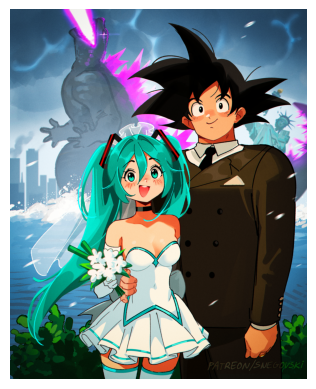

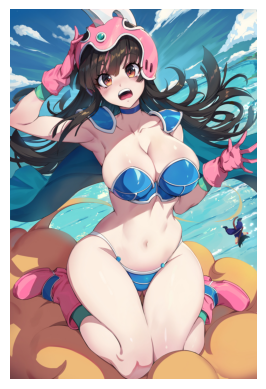

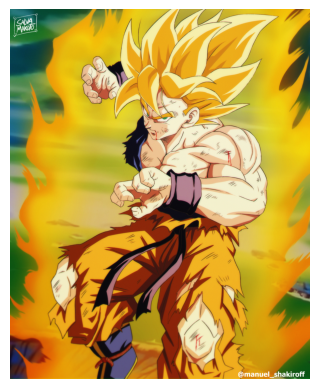

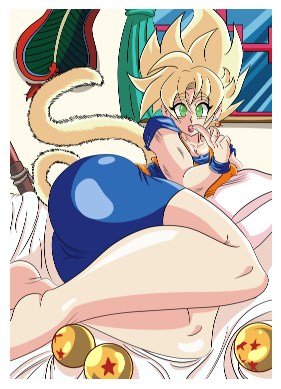

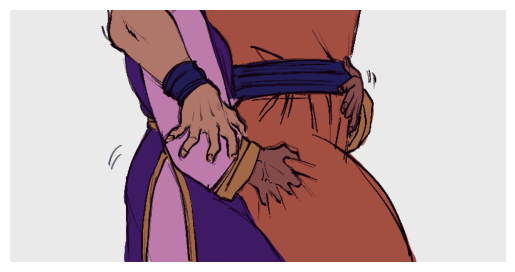

In [25]:
requete = "son_goku"
nb_images = 5

# Définir l'URL de Danbooru
base_url = 'https://danbooru.donmai.us/posts.json'  # Endpoint pour récupérer les posts au format JSON

# Définir les paramètres de la requête
params = {
    'tags': f'{requete} rating:safe rating:score',  # Filtrer les résultats par la balise et par rating 'safe', "rating:score" ne change rien
    'limit': nb_images,                             # Limite du nombre d'images à récupérer
}

response = requests.get(base_url, params=params)

# Vérifier si la requête est réussie
if response.status_code == 200:
    images = response.json()  # Récupérer les résultats au format JSON

    # Trier les images par score (le plus haut en premier)
    images_sorted = sorted(images, key=lambda x: x['score'], reverse=True)

    # Télécharger et afficher les images triées par score
    for image in images_sorted:
        image_url = image.get('file_url', '')  # Lien de l'image

        # Ajouter https:// si nécessaire
        if image_url and not image_url.startswith('https://'):
            image_url = 'https:' + image_url

        if image_url:
            # Récupérer les données de l'image
            img_data = requests.get(image_url).content
            img = Image.open(BytesIO(img_data))  # Charger l'image en mémoire

            # Afficher l'image
            plt.imshow(img)
            plt.axis('off')  # Masquer les axes
            plt.show()
else:
    print(f"Erreur dans la requête : {response.status_code}")


### On essaie l'API de la version ""safe"" de Danbooru

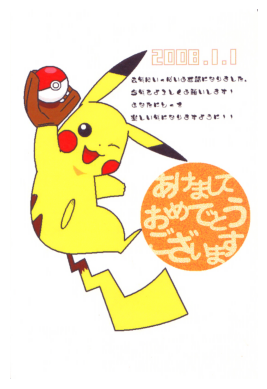

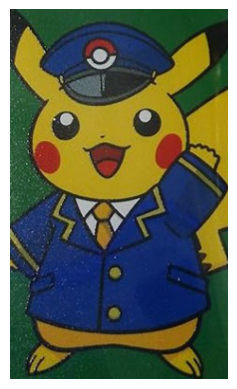

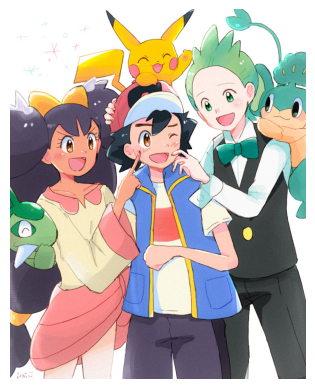

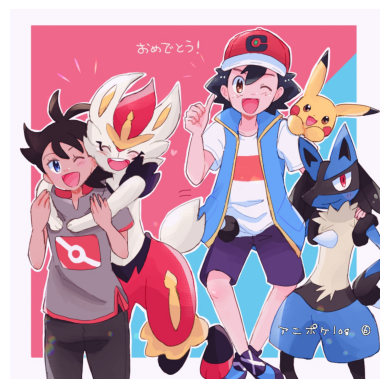

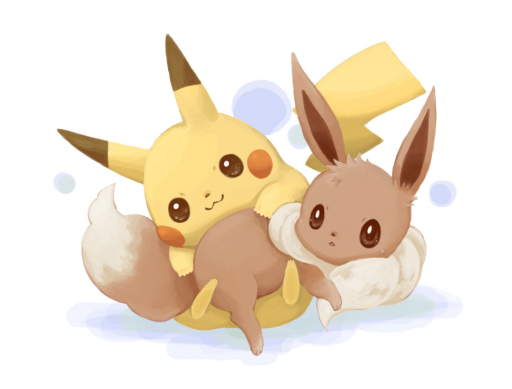

In [36]:
requete = "pikachu"  # Remplace avec la balise que tu souhaites
nb_images = 5  # Nombre d'images à récupérer

# Définir l'URL de Safe Danbooru
base_url = 'https://safebooru.org/index.php'

# Définir les paramètres de la requête
params = {
    'page': 'dapi',        # API de Safe Danbooru
    's': 'post',           # Type de requête : "post"
    'q': 'index',          # Action demandée
    'tags': f'{requete} rating:safe',  # Filtrer par la balise et par rating "safe"
    'limit': nb_images,    # Limiter le nombre de résultats
    'json': 1,            # Demander le format JSON
    #'order': "score" ne sert à rien
}

response = requests.get(base_url, params=params)

# Vérifier si la requête est réussie
if response.status_code == 200:
    images = response.json()  # Récupérer les résultats au format JSON
    
    # Télécharger et afficher les images triées
    for image in images:
        image_url = image.get('file_url', '')  # Lien de l'image

        # Ajouter https:// si nécessaire
        if image_url and not image_url.startswith('https://'):
            image_url = 'https:' + image_url

        if image_url:
            # Récupérer les données de l'image
            img_data = requests.get(image_url).content
            img = Image.open(BytesIO(img_data))  # Charger l'image en mémoire

            # Afficher l'image
            plt.imshow(img)
            plt.axis('off')  # Masquer les axes
            plt.show()
else:
    print(f"Erreur dans la requête : {response.status_code}")

Comme précédemment on effectue le tri des images par score après les avoir récupérer

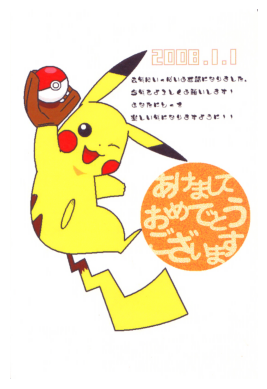

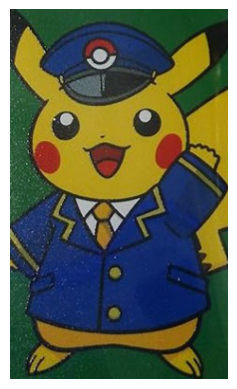

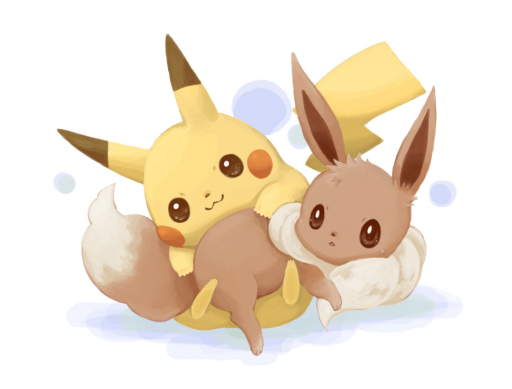

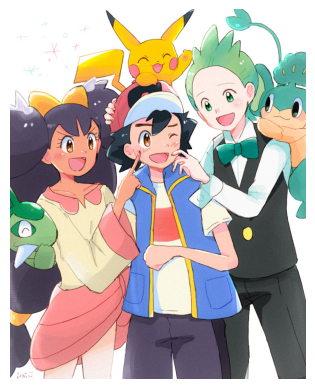

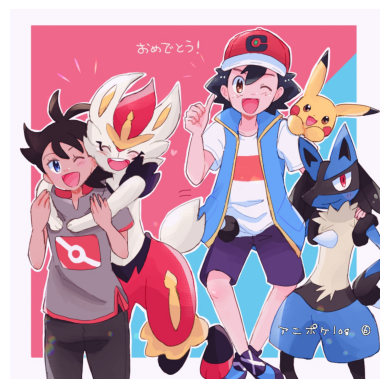

In [98]:
requete = "pikachu"  # Remplace avec la balise que tu souhaites
nb_images = 5  # Nombre d'images à récupérer

# Définir l'URL de Safe Danbooru
base_url = 'https://safebooru.org/index.php'

# Définir les paramètres de la requête
params = {
    'page': 'dapi',        # API de Safe Danbooru
    's': 'post',           # Type de requête : "post"
    'q': 'index',          # Action demandée
    'tags': f'{requete} rating:safe',  # Filtrer par la balise et par rating "safe"
    'limit': nb_images,    # Limiter le nombre de résultats
    'json': 1,             # Demander le format JSON
}

# Effectuer la requête GET
response = requests.get(base_url, params=params)

# Vérifier si la requête est réussie
if response.status_code == 200:
    images = response.json()  # Récupérer les résultats au format JSON
    
    # Trier les images manuellement par score (si le score existe)
    images_sorted = sorted(images, key=lambda x: x.get('score', 0), reverse=True)

    # Télécharger et afficher les images triées
    for image in images_sorted:
        image_url = image.get('file_url', '')  # Lien de l'image

        # Ajouter https:// si nécessaire
        if image_url and not image_url.startswith('https://'):
            image_url = 'https:' + image_url

        if image_url:
            # Récupérer les données de l'image
            img_data = requests.get(image_url).content
            img = Image.open(BytesIO(img_data))  # Charger l'image en mémoire

            # Afficher l'image
            plt.imshow(img)
            plt.axis('off')  # Masquer les axes
            plt.show()
else:
    print(f"Erreur dans la requête : {response.status_code}")

In [91]:
# base_url = 'https://safebooru.org/index.php'
# requete = "pikachu"
# nb_images = 3
# tri = "score"

# params = {
#     'page': 'dapi',
#     's': 'post',
#     'q': 'index',
#     'tags': f'{requete} rating:safe',
#     'limit': nb_images,
#     'json': 1,
# }

# try:
#     response = requests.get(base_url, params=params, timeout=10)
#     response.raise_for_status()

#     print("Statut de la réponse :", response.status_code)
#     print("En-têtes de la réponse :", response.headers)

#     print("Réponse brute de l'API :")
#     print(response.text)

#     try:
#         images = response.json()
#     except json.JSONDecodeError as e:
#         print(f"Erreur de décodage JSON : {e}")
#         print("Contenu de la réponse (pour débogage) :")
#         print(response.text)
#         exit() # Arrêter l'exécution en cas d'erreur JSON

#     if not images:
#         print("Aucune image trouvée.")
#     else:
#         print("\nInformations sur les images (avec vérification du score) :")
#         for i, image in enumerate(images):
#             print(f"\nImage {i+1}:")
#             print(json.dumps(image, indent=4)) # Affichage formaté du JSON de chaque image

#             if 'score' in image:
#                 print(f"  Score: {image['score']}")
#             else:
#                 print("  Le score n'est pas présent pour cette image.")
#             if 'id' in image:
#                 print(f"  ID: {image['id']}")
#             else:
#                 print("  L'ID n'est pas présent pour cette image.")

#         if tri == "score":
#             if all('score' in image for image in images): # Vérifie si toutes les images ont un score
#                 images_tries = sorted(images, key=operator.itemgetter('score'), reverse=True)
#             else:
#                 print("Impossible de trier par score car toutes les images n'ont pas de score.")
#                 images_tries = images # Ne pas trier si les scores sont manquants
#         elif tri == "id":
#             images_tries = sorted(images, key=operator.itemgetter('id'))
#         elif tri == "rating":
#             images_tries = sorted(images, key=operator.itemgetter('rating'))
#         elif tri == "user":
#             images_tries = sorted(images, key=operator.itemgetter('creator_id'))
#         elif tri == "date":
#             images_tries = sorted(images, key=operator.itemgetter('created_at'))
#         else:
#             images_tries = images
#             print("Critère de tri non reconnu, affichage dans l'ordre reçu.")

#         for image in images_tries:
#             # ... (reste du code pour afficher les images)

# except requests.exceptions.RequestException as e:
#     print(f"Erreur requête : {e}")
# except ValueError as e:
#     print(f"Erreur JSON : {e}")
# except Exception as e:
#     print(f"Erreur inattendue : {e}")

enregistrement images

In [69]:
requete = "pikachu"  # Remplace avec la balise que tu souhaites
nb_images = 5  # Nombre d'images à récupérer

# Définir l'URL de Safe Danbooru
base_url = 'https://safebooru.org/index.php'

# Définir les paramètres de la requête
params = {
    'page': 'dapi',        # API de Safe Danbooru
    's': 'post',           # Type de requête : "post"
    'q': 'index',          # Action demandée
    'tags': f'{requete} rating:safe',  # Filtrer par la balise et par rating "safe"
    'limit': nb_images,    # Limiter le nombre de résultats
    'json': 1,             # Demander le format JSON
}

# Effectuer la requête GET
response = requests.get(base_url, params=params)

# Vérifier si la requête est réussie
if response.status_code == 200:
    images = response.json()  # Récupérer les résultats au format JSON
    
    # Créer un dossier pour sauvegarder les images
    os.makedirs('safe_images', exist_ok=True)

    # Télécharger les images
    for image in images:
        image_url = image.get('file_url', '')  # Récupère le lien de l'image sans ajouter "https:"
        
        # Vérifie si l'URL de l'image commence déjà par https://
        if not image_url.startswith('https://'):
            image_url = 'https:' + image_url  # Ajoute https:// si nécessaire
        
        if image_url:
            try:
                img_data = requests.get(image_url).content
                img_name = os.path.join('safe_images', image_url.split('/')[-1])
                
                with open(img_name, 'wb') as handler:
                    handler.write(img_data)
                    print(f"Image sauvegardée sous : {img_name}")
            except Exception as e:
                print(f"Erreur lors du téléchargement de l'image : {image_url} - {e}")
else:
    print(f"Erreur dans la requête : {response.status_code} - {response.text}")

Image sauvegardée sous : safe_images\fc763452a57d20611c2638a5c279384f7d3443f1.jpg
Image sauvegardée sous : safe_images\ed0fac5d0249502b68711a1ab640aa61c891f7e5.jpg
Image sauvegardée sous : safe_images\aa9cf09ff37300a36dabda3a1bc4cd70d52d8514.png
Image sauvegardée sous : safe_images\bc0db7d28d065954c1f91a1dd0f0a35f3d2afa4f.png
Image sauvegardée sous : safe_images\da9aafb8e3f5b05049874c973f00eca56fe695dd.png
Image sauvegardée sous : safe_images\5cfbb5c58af34a1387762cbf477b44c63821178f.jpg
Image sauvegardée sous : safe_images\e57d121c25b00693d8af1d6c61fc18d3c183a81f.jpg
Image sauvegardée sous : safe_images\96aa0aed6c94d4d4296b4943e8339b8158c1d1e8.jpg
Image sauvegardée sous : safe_images\3aea70353c51800fc55899f3c410ff9d433abfb0.jpg
Image sauvegardée sous : safe_images\d1a7afa4d689cee836107bb89e499b27c1e4f1ff.png


# 2) (tentative!) Récuperer infos ou descriptions perso Danbooru wiki_pages

### Not used

In [102]:
# # Définir les paramètres de la requête
# base_url = 'https://danbooru.donmai.us/tags.json'  # Endpoint pour récupérer des informations sur les tags
# params = {
#     'search[name_matches]': 'hatsune',  # Filtrer par le nom du personnage (ex : Naruto Uzumaki)
#     'search[category]': 1,  # 5 correspond aux tags de type "Character"
#     'limit': 1  # Limiter les résultats pour éviter un trop grand nombre de réponses
# }

# # Effectuer la requête GET
# response = requests.get(base_url, params=params)

# # Vérifier si la requête est réussie
# if response.status_code == 200:
#     characters = response.json()  # Récupérer les résultats au format JSON

#     print(characters)

#     # Parcourir les résultats pour afficher un résumé des informations
#     for char in characters:
#         print("Nom :", char.get('name', 'Inconnu'))
#         print("Post Count :", char.get('post_count', 'Non spécifié'))  # Nombre d'images taguées avec ce personnage
#         print("Description :", char.get('description', 'Pas de description disponible'))  # Description du personnage
#         print("-" * 40)
# else:
#     print(f"Erreur dans la requête : {response.status_code} - {response.text}")

[{'id': 462766, 'name': 'hatsune', 'post_count': 0, 'category': 1, 'created_at': '2013-02-28T09:47:49.332-05:00', 'updated_at': '2019-09-02T06:54:53.854-04:00', 'is_deprecated': False, 'words': ['hatsune']}]
Nom : hatsune
Post Count : 0
Description : Pas de description disponible
----------------------------------------


In [116]:
# # Définir l'URL de SafeBooru
# base_url = 'https://safebooru.org/index.php'

# # Définir les paramètres pour récupérer des posts avec des informations sur les tags
# params = {
#     'page': 'dapi',        # API de SafeBooru
#     's': 'post',           # Type de requête : "post"
#     'q': 'index',          # Action demandée
#     'tags': 'mario',     # Filtrer par un tag (exemple : "hatsune")
#     'limit': 1,            # Limiter le nombre de résultats
#     'json': 1              # Demander les résultats en format JSON
# }

# # Effectuer la requête GET
# response = requests.get(base_url, params=params)

# # Vérifier si la requête est réussie
# if response.status_code == 200:
#     results = response.json()  # Récupérer les résultats au format JSON
#     if results:

#         print(results)
        
#         for post in results:
#             print("ID du post :", post.get('id', 'Inconnu'))
#             print("Tags associés :", post.get('tags', 'Pas de tags disponibles'))
#             print("Score :", post.get('score', 'Non spécifié'))
#             print("URL de l'image :", post.get('file_url', 'Non spécifié'))
#             print("-" * 40)
#     else:
#         print("Aucun résultat trouvé pour cette recherche.")
# else:
#     print(f"Erreur dans la requête : {response.status_code} - {response.text}")


[{'preview_url': 'https://safebooru.org/thumbnails/2054/thumbnail_9e26a3033251732aea8c15db8f793aaed11d5b24.jpg', 'sample_url': 'https://safebooru.org/images/2054/9e26a3033251732aea8c15db8f793aaed11d5b24.png', 'file_url': 'https://safebooru.org/images/2054/9e26a3033251732aea8c15db8f793aaed11d5b24.png', 'directory': 2054, 'hash': 'a53f032093ca9e9e5659df10a9728a1b', 'width': 800, 'height': 600, 'id': 5506577, 'image': '9e26a3033251732aea8c15db8f793aaed11d5b24.png', 'change': 1737779414, 'owner': 'danbooru', 'parent_id': 0, 'rating': 'general', 'sample': False, 'sample_height': 0, 'sample_width': 0, 'score': None, 'tags': '1boy blue_eyes bow bowtie brown_hair cosplay disney dual_persona facial_hair gloves looking_at_viewer mach_bike_(mario) male_focus mario mario_kart mario_kart_wii mickey_mouse mickey_mouse_(cosplay) mustache riomario shirt short_hair solo standard_kart_(mario) super_mario_bros.', 'source': 'https://i.pximg.net/img-original/img/2012/11/11/10/29/21/31424735_p2.png', 'statu

### API pour les pages wiki Danbooru:

In [41]:
requete = "mario"  # Remplace avec la balise que tu souhaites

# Définir l'URL de l'API pour les pages wiki
base_url = 'https://danbooru.donmai.us/wiki_pages.json'

# Définir les paramètres de la requête
params = {
    'search[title]': requete,  # Nom du personnage recherché
    'limit': 1  # Limiter le nombre de résultats
}

# Effectuer la requête GET
response = requests.get(base_url, params=params)

# Vérifier si la requête est réussie
if response.status_code == 200:
    wiki_pages = response.json()  # Récupérer les résultats au format JSON
    if wiki_pages:
        for page in wiki_pages:
            print("Titre :", page.get('title', 'Inconnu'))
            print("Description :", page.get('body', 'Pas de description disponible'))
            # print("Lien vers la page :", f"https://danbooru.donmai.us/wiki_pages/{page.get('id')}")
            # print("-" * 40)
    else:
        print("Aucune page wiki trouvée pour ce personnage.")
else:
    print(f"Erreur dans la requête : {response.status_code} - {response.text}")

Titre : mario
Description : [b]Mario[/b] ([b]マリオ[/b]) is the main protagonist of the [[mario (series)|Mario series]], the legendary mascot of [[Nintendo]], and basically the video game equivalent of [[Mickey Mouse]]. 

Mario is normally a [[plumber]], but in games, he uses his legendary [[jumping]] and combat abilities to defend the inhabitants of the usually peaceful Mushroom World from power-hungry villains such as [[Bowser]]. During most of his adventures, he often teams up with his brother [[Luigi]] and their partner [[Yoshi]] for extra support, as they are the only two characters he fully trusts to help him. When not adventuring, Mario participates in a variety of [[playing sports|sporting events]] and even works as one of his alter-egos, [[Dr. Mario]]. 

h4. Official Art

* !post #7952707

h4. Related tags

* [[Baby Mario]]
* [[Balloon Mario]]
* [[Bee Mario]]
* [[Boo Mario]]
* [[Boomerang Mario]]
* [[Bubble Mario]]
* [[Builder Mario]]
* [[Cape Mario]]
* [[Cat Mario]]
* [[Cloud Ma

On a la même description sur la version Safe, alors qu'on avait pas les même images:

In [42]:
requete = 'mario'

# Définir l'URL de l'API pour les pages wiki sur SafeDanbooru
base_url = 'https://safebooru.donmai.us/wiki_pages.json'

# Définir les paramètres de la requête
params = {
    'search[title]': requete,  # Nom du personnage recherché
    'limit': 1  # Limiter le nombre de résultats pour éviter des réponses trop volumineuses
}

# Effectuer la requête GET
response = requests.get(base_url, params=params)

# Vérifier si la requête est réussie
if response.status_code == 200:
    wiki_pages = response.json()  # Récupérer les résultats au format JSON
    if wiki_pages:
        for page in wiki_pages:
            print("Titre :", page.get('title', 'Inconnu'))
            print("Description :", page.get('body', 'Pas de description disponible'))
            # Lien vers la page SafeDanbooru
            print("Lien vers la page :", f"https://safebooru.donmai.us/wiki_pages/{page.get('id')}")
            print("-" * 40)
    else:
        print("Aucune page wiki trouvée pour ce personnage.")
else:
    print(f"Erreur dans la requête : {response.status_code} - {response.text}")


Titre : mario
Description : [b]Mario[/b] ([b]マリオ[/b]) is the main protagonist of the [[mario (series)|Mario series]], the legendary mascot of [[Nintendo]], and basically the video game equivalent of [[Mickey Mouse]]. 

Mario is normally a [[plumber]], but in games, he uses his legendary [[jumping]] and combat abilities to defend the inhabitants of the usually peaceful Mushroom World from power-hungry villains such as [[Bowser]]. During most of his adventures, he often teams up with his brother [[Luigi]] and their partner [[Yoshi]] for extra support, as they are the only two characters he fully trusts to help him. When not adventuring, Mario participates in a variety of [[playing sports|sporting events]] and even works as one of his alter-egos, [[Dr. Mario]]. 

h4. Official Art

* !post #7952707

h4. Related tags

* [[Baby Mario]]
* [[Balloon Mario]]
* [[Bee Mario]]
* [[Boo Mario]]
* [[Boomerang Mario]]
* [[Bubble Mario]]
* [[Builder Mario]]
* [[Cape Mario]]
* [[Cat Mario]]
* [[Cloud Ma

# 3) Wikipedia API information

#### Récuperations intro

Je pense que le reste (autre que l'intro) trop large pour donner la personnalité

In [44]:
personnage = "Albert Einstein"

# Définir l'URL de base pour l'API Wikipédia
base_url = 'https://en.wikipedia.org/w/api.php'

# Définir les paramètres de la requête
params = {
    'action': 'query',  # Action pour interroger des pages
    'format': 'json',   # Format de la réponse
    'titles': personnage,  # Nom de la personne recherchée
    'prop': 'extracts',  # Récupérer le contenu des extraits
    'exintro': True,     # Obtenir uniquement l'introduction de la page ## TRES UTILE !
    'explaintext': True  # Obtenir un texte brut, sans HTML
}

# Effectuer la requête GET
response = requests.get(base_url, params=params)

# Vérifier si la requête est réussie
if response.status_code == 200:
    data = response.json()  # Récupérer la réponse au format JSON
    pages = data.get('query', {}).get('pages', {})
    
    if pages:
        for page_id, page_info in pages.items():
            if 'missing' in page_info:
                print("Aucune page trouvée pour cette personne.")
            else:
                print("Titre :", page_info.get('title', 'Inconnu'))
                print("Introduction :", page_info.get('extract', 'Pas d’informations disponibles.'))
                print(f"Lien vers la page : https://en.wikipedia.org/wiki/{page_info.get('title').replace(' ', '_')}")
                print("-" * 40)
    else:
        print("Aucune information trouvée pour cette personne.")
else:
    print(f"Erreur dans la requête : {response.status_code} - {response.text}")


Titre : Albert Einstein
Introduction : Albert Einstein (, EYEN-styne; German: [ˈalbɛʁt ˈʔaɪnʃtaɪn] ; 14 March 1879 – 18 April 1955) was a German-born theoretical physicist who is best known for developing the theory of relativity. Einstein also made important contributions to quantum mechanics. His mass–energy equivalence formula E = mc2, which arises from special relativity, has been called "the world's most famous equation". He received the 1921 Nobel Prize in Physics for his services to theoretical physics, and especially for his discovery of the law of the photoelectric effect.
Born in the German Empire, Einstein moved to Switzerland in 1895, forsaking his German citizenship the following year. In 1897, at the age of seventeen, he enrolled in the mathematics and physics teaching diploma program at the Swiss Federal Polytechnic School in Zurich, graduating in 1900. He acquired Swiss citizenship a year later and afterwards secured a permanent position at the Swiss Patent Office in Be

### Info sur la personnalité ??

Pour avoir la personnalité, renvoyer les sections wiki où les mots "personality" ou "character" sont présents:
Spoiler je pense pas que ça marche

In [45]:
personnage = "Albert Einstein"

# Paramètres pour récupérer l'intégralité de l'article en texte brut
params = {
    'action': 'query',
    'format': 'json',
    'titles': personnage,
    'prop': 'extracts',
    'explaintext': True  # Texte brut sans balises HTML
}

# Effectuer la requête
response = requests.get(base_url, params=params)

if response.status_code == 200:
    data = response.json()
    pages = data['query']['pages']
    for page_id, page_content in pages.items():
        if 'extract' in page_content:
            full_text = page_content['extract']
            
            # Chercher une section spécifique contenant "Personality" ou "Caractère"
            lines = full_text.split('\n')
            for i, line in enumerate(lines):
                if "personality" in line.lower() or "character" in line.lower():
                    print(f"Section potentielle trouvée : {line.strip()}")
                    print("Contenu probable :")
                    print("\n".join(lines[i+1:i+5]))  # Afficher les 4 lignes suivantes
                    break
            else:
                print("Aucune section sur la personnalité trouvée.")
else:
    print(f"Erreur dans la requête : {response.status_code}")


Section potentielle trouvée : Einstein began his new life as an intellectual icon in America, where he arrived on 2 April 1921. He was welcomed to New York City by Mayor John Francis Hylan, and then spent three weeks giving lectures and attending receptions. He spoke several times at Columbia University and Princeton, and in Washington, he visited the White House with representatives of the National Academy of Sciences. He returned to Europe via London, where he was the guest of the philosopher and statesman Viscount Haldane. He used his time in the British capital to meet several people prominent in British scientific, political or intellectual life, and to deliver a lecture at King's College. In July 1921, he published an essay, "My First Impression of the U.S.A.", in which he sought to sketch the American character, much as had Alexis de Tocqueville in Democracy in America (1835). He wrote of his transatlantic hosts in highly approving terms: What strikes a visitor is the joyous, po

!! En fait on peut utiliser  le module python wikipediaapi... cf Nicolas

# AniList

### GRAPHQL description

In [46]:
personnage = "naruto" #gokuu...

# Définir l'URL de l'API AniList
url = "https://graphql.anilist.co"

# Définir la requête GraphQL pour récupérer la description d'un personnage
query = """
query ($name: String) {
  Character(search: $name) {
    description
  }
}
"""
# Paramètres de la requête
variables = {
    "name": personnage
}

# Effectuer la requête GET avec GraphQL
response = requests.post(url, json={'query': query, 'variables': variables})

# Vérifier si la requête est réussie
if response.status_code == 200:
    data = response.json()
    character = data['data']['Character']
    
    # Afficher la description du personnage
    print("Description :", character['description'])
else:
    print(f"Erreur dans la requête : {response.status_code}")

Description : __Height__: 145-180 cm 
__Family:__ ~![Minato Namikaze](https://anilist.co/character/2535) (father), [Kushina Uzumaki](https://anilist.co/character/7302) (mother), [Jiraiya](https://anilist.co/character/2423) (godfather)  !~

Born in Konohagakure, a ninja village hidden in the leaves, Naruto Uzumaki was destined for greatness. When born, a powerful [nine-tailed demon fox](https://anilist.co/character/7407) attacked his village. With a wave of its tail, the demon fox could raise tsunamis and shatter mountains. In a valiant attempt to save the village from destruction, the Fourth Hokage and leader of the Hidden Leaf Village sealed the demon fox within Naruto's newborn body. This was his final act, for the battle with the fox cost him his life.  Despite the Fourth Hokage's dying wish that Naruto is viewed as a hero for serving as the container for the demon (a  _Jinchuuriki_), the adult villagers of Konoha harbored a fierce hatred for him, with many believing that Naruto and

### description de la page de l'animé (et pas du perso), une autre description mais qui nécessite le lien et valable que pour le main character

In [47]:
from bs4 import BeautifulSoup

# URL de l'anime
url = 'https://anilist.co/anime/20/NARUTO'

# Récupérer le contenu de la page
response = requests.get(url)

# Parser le contenu HTML avec BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Rechercher la balise meta contenant la description de l'anime
description_tag = soup.find('meta', {'property': 'og:description'})

# Extraire le contenu de la description
if description_tag:
    description = description_tag.get('content')
    print(description)
else:
    print("Description non trouvée.")


Naruto Uzumaki, a hyperactive and knuckle-headed ninja, lives in Konohagakure, the Hidden Leaf village. Moments prior to his birth, a huge demon known as the Kyuubi, the Nine-tailed Fox, attacked Konohagakure and wreaked havoc. In order to put an end to the Kyuubi's rampage, the leader of the village, the 4th Hokage, sacrificed his life and sealed the monstrous beast inside the newborn Naruto. 
Shunned because of the presence of the Kyuubi inside him, Naruto struggles to find his place in the village. He strives to become the Hokage of Konohagakure, and he meets many friends and foes along the way.
